In [ ]:
Librerias

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit, golden

In [ ]:
Grafica de puntos

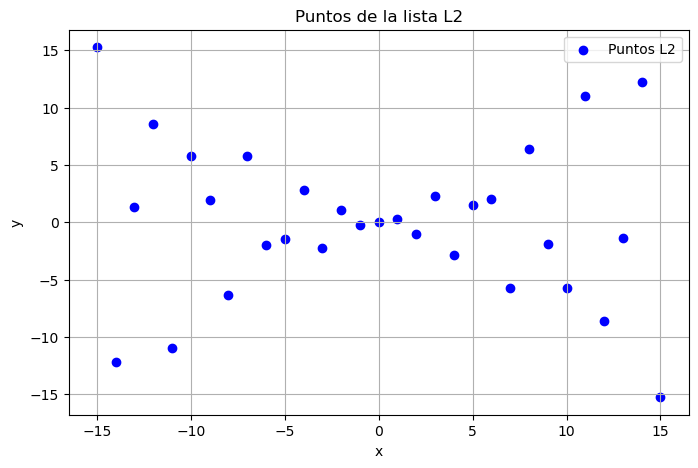

In [21]:
import re
import numpy as np
import matplotlib.pyplot as plt
import os

# Ruta al archivo
ruta_archivo = r"C:\Users\totoe\Desktop\5to semestre\Listas de puntos para el proyecto.txt"

if os.path.exists(ruta_archivo):
    with open(ruta_archivo, 'r', encoding='utf-8') as file:
        contenido = file.read()

    match = re.search(r'L2\s*=\s*\{(.*?)\}\s*(?:;|\n)', contenido, re.DOTALL)

    if match:
        lista_puntos = match.group(1)
        pares = re.findall(r'\{([^,]+),\s*([^\}]+)\}', lista_puntos)

        # Convertir a float
        x_data = np.array([float(p[0]) for p in pares])
        y_data = np.array([float(p[1]) for p in pares])

        # Gráfica
        plt.figure(figsize=(8, 5))
        plt.scatter(x_data, y_data, color='blue', label='Puntos L2')
        plt.title("Puntos de la lista L2")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.grid(True)
        plt.legend()
        plt.show()
else:
    print(f"El archivo no fue encontrado en la ruta: {ruta_archivo}")


In [ ]:
Ajuste de curva

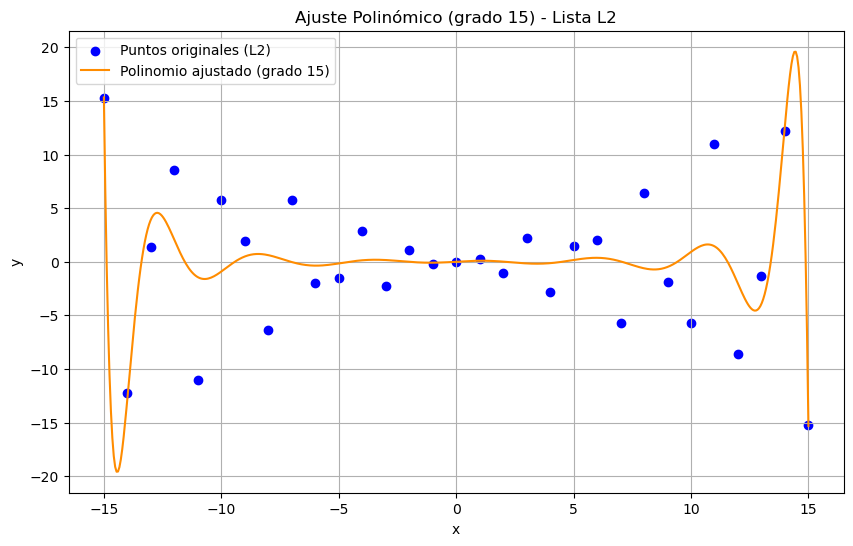

Coeficientes del polinomio (de mayor a menor grado):

[-6.57791540e-14  5.87761189e-26  4.59013972e-11 -1.30548425e-23
 -1.23996675e-08 -4.28198631e-21  1.63792190e-06  1.55537649e-18
 -1.09947405e-04 -1.64389508e-16  3.52538572e-03  6.69314796e-15
 -4.46778240e-02 -9.18734493e-14  1.33952141e-01  3.68915090e-13]


In [12]:
import re
import numpy as np
import matplotlib.pyplot as plt
import os

# Ruta al archivo
ruta_archivo = r"C:\Users\totoe\Desktop\5to semestre\Listas de puntos para el proyecto.txt"

with open(ruta_archivo, 'r', encoding='utf-8') as file:
    contenido = file.read()

# Buscar contenido de L2
match = re.search(r'L2\s*=\s*\{(.*?)\}\s*(?:;|\n)', contenido, re.DOTALL)

if match:
    lista_puntos = match.group(1)
    pares = re.findall(r'\{([^,]+),\s*([^\}]+)\}', lista_puntos)

    # Datos originales
    x_data = np.array([float(p[0]) for p in pares])
    y_data = np.array([float(p[1]) for p in pares])

    grado = 15
    coeficientes = np.polyfit(x_data, y_data, grado)
    polinomio_ajustado = np.poly1d(coeficientes)

    x_curva = np.linspace(min(x_data), max(x_data), 500)
    y_curva = polinomio_ajustado(x_curva)

    # Gráfica
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, color='blue', label='Puntos originales (L2)')
    plt.plot(x_curva, y_curva, color='darkorange', label=f'Polinomio ajustado (grado {grado})')
    plt.title("Ajuste Polinómico (grado 15) - Lista L2")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Mostrar coeficientes
    print("Coeficientes del polinomio (de mayor a menor grado):\n")
    print(coeficientes)


In [ ]:
que funcion nos da?

In [15]:
funcion_str = "f(x) = "
for i, coef in enumerate(polinomio_ajustado.coefficients):
    exp = len(polinomio_ajustado.coefficients) - i - 1
    signo = " + " if coef >= 0 else " - "
    coef_abs = abs(coef)
    if exp > 1:
        funcion_str += f"{signo}{coef_abs:.6e}·x^{exp}"
    elif exp == 1:
        funcion_str += f"{signo}{coef_abs:.6e}·x"
    else:
        funcion_str += f"{signo}{coef_abs:.6e}"

print("Función polinómica ajustada (grado 15):")
print(funcion_str.lstrip(" +"))

Función polinómica ajustada (grado 15):
f(x) =  - 6.577915e-14·x^15 + 5.877612e-26·x^14 + 4.590140e-11·x^13 - 1.305484e-23·x^12 - 1.239967e-08·x^11 - 4.281986e-21·x^10 + 1.637922e-06·x^9 + 1.555376e-18·x^8 - 1.099474e-04·x^7 - 1.643895e-16·x^6 + 3.525386e-03·x^5 + 6.693148e-15·x^4 - 4.467782e-02·x^3 - 9.187345e-14·x^2 + 1.339521e-01·x + 3.689151e-13


In [ ]:
Maximo utilizando el Metodo de la seccion dorada en el intervalo "[5,9]"

In [18]:
import numpy as np

f = polinomio_ajustado

R = (np.sqrt(5) - 1) / 2  # ≈ 0.6180339887

# Intervalo de búsqueda dado
xa = 5
xb = 9

tolerancia = 1e-5
iteracion = 0

# Para guardar datos de cada paso
historial = []

# Algoritmo de la sección dorada (para máximo)
while abs(xb - xa) > tolerancia:
    d = R * (xb - xa)
    x1 = xb - d
    x2 = xa + d
    f1 = f(x1)
    f2 = f(x2)

    historial.append((iteracion, xa, x1, x2, xb, f1, f2))

    if f1 > f2:
        xb = x2
    else:
        xa = x1

    iteracion += 1

# Resultado final
x_max = (xa + xb) / 2
y_max = f(x_max)

print(f"Máximo encontrado usando sección dorada:")
print(f"Intervalo: [5, 9]")
print(f"Iteraciones: {iteracion}")
print(f"x ≈ {x_max:.6f}")
print(f"y ≈ {y_max:.6f}")


Máximo encontrado usando sección dorada:
Intervalo: [5, 9]
Iteraciones: 27
x ≈ 5.965229
y ≈ 0.365317
